# Smooth the transmission

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : May 22th 2023
- update : May 22th 2023

** Kernel anaconda3_auxtel**

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

## Config

In [12]:

DATE = 20230509
FILTERTYPE = "empty~holo4_003"
SITE = "AUXTEL"
spectractormode = "psf2dffm"
ext = "rebin2"   # run BPS by removing ACQ
FLAG_POLAR = True
filename = "MLfit_bouguer_linearfit-20230509-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv"

## Read file

In [8]:
df = pd.read_csv(filename,index_col=0)

In [11]:
df.head()

,wavelength,throu,errthrou,sedtoa,errsedtoa
0,350.000000,0.017504,0.017333,8.848345e-14,8.761914e-14
1,364.285714,0.028787,0.010248,3.094585e-13,1.101644e-13
2,378.571429,0.046757,0.008440,5.350280e-13,9.657702e-14
3,392.857143,0.076611,0.014282,1.030154e-12,1.920494e-13
4,407.142857,0.105480,0.015863,1.819936e-12,2.737048e-13


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 0.25)

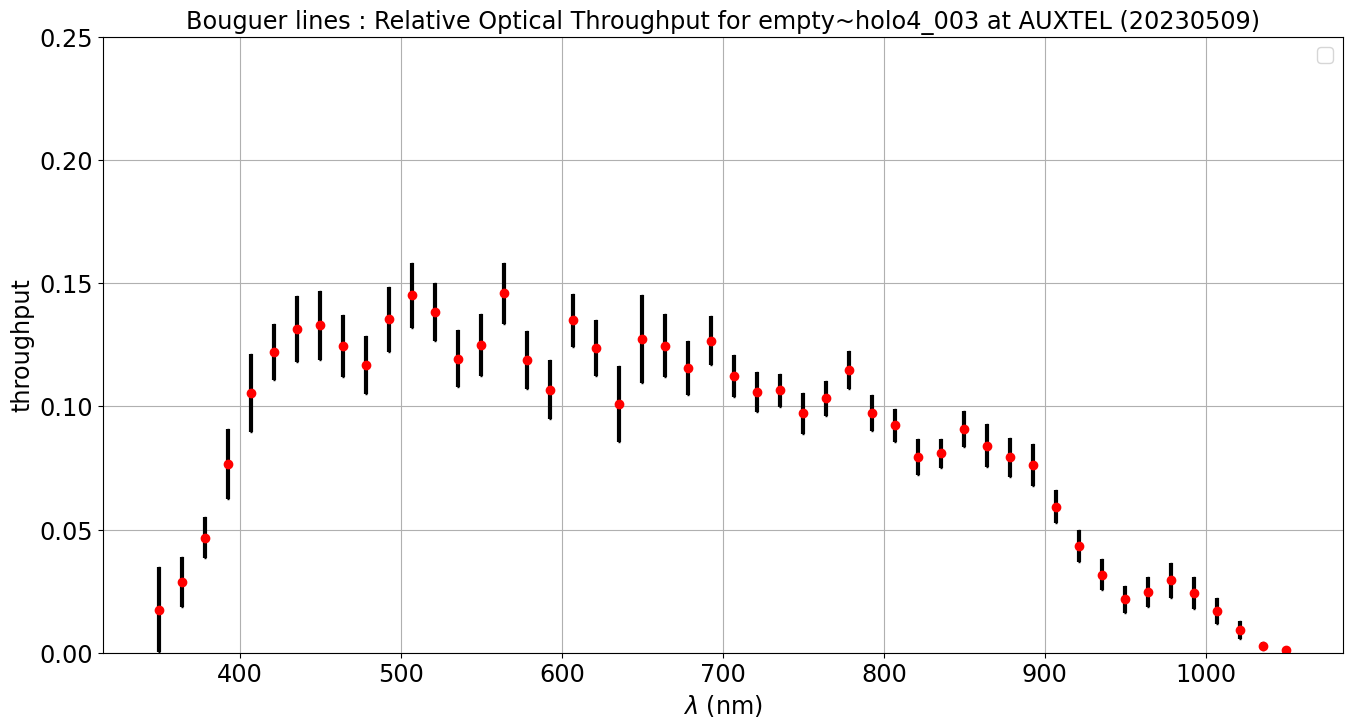

In [13]:
fig = plt.figure(figsize=(16,8))
ax=fig.add_subplot(111)
X=df["wavelength"].values
Y=df["throu"].values
EY= df["errthrou"].values
ax.errorbar(X,Y, yerr=EY, xerr=None, fmt='o',color="r",ecolor="k", elinewidth=3, capsize=1)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("throughput")
title=f"Bouguer lines : Relative Optical Throughput for {FILTERTYPE} at {SITE} ({DATE})"
ax.set_title(title)
ax.grid()
ax.legend()
#ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.set_ylim(0,0.25)
        